In [10]:
# Using the dataset from Kaggle https://www.kaggle.com/datasets/mrmorj/dataset-of-songs-in-spotify
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

df = pd.read_csv("spotify_data.csv", low_memory=False)
print(df.head())

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.831   0.814    2    -7.364     1       0.4200        0.0598   
1         0.719   0.493    8    -7.230     1       0.0794        0.4010   
2         0.850   0.893    5    -4.783     1       0.0623        0.0138   
3         0.476   0.781    0    -4.710     1       0.1030        0.0237   
4         0.798   0.624    2    -7.668     1       0.2930        0.2170   

   instrumentalness  liveness  valence  ...                      id  \
0          0.013400    0.0556   0.3890  ...  2Vc6NJ9PW9gD9q343XFRKx   
1          0.000000    0.1180   0.1240  ...  7pgJBLVz5VmnL7uGHmRj6p   
2          0.000004    0.3720   0.0391  ...  0vSWgAlfpye0WCGeNmuNhy   
3          0.000000    0.1140   0.1750  ...  0VSXnJqQkwuH2ei1nOQ1nu   
4          0.000000    0.1660   0.5910  ...  4jCeguq9rMTlbMmPHuO7S3   

                                    uri  \
0  spotify:track:2Vc6NJ9PW9gD9q343XFRKx   
1  spotify:track:7pgJBLVz5VmnL7uGHmR

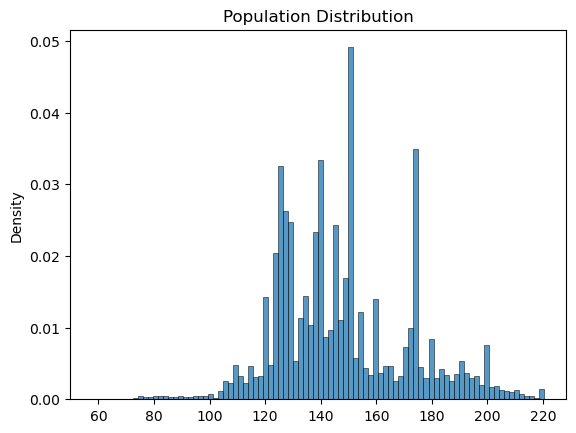

<Figure size 640x480 with 0 Axes>

In [26]:
# Creating a population distribution of song tempos 

song_tempos = df["tempo"]
def population_distribution(population):
  sns.histplot(population, stat='density')
  plt.title(f"Population Distribution")
  plt.xlabel('')
  plt.show()
  plt.clf()

population_distribution(song_tempos)

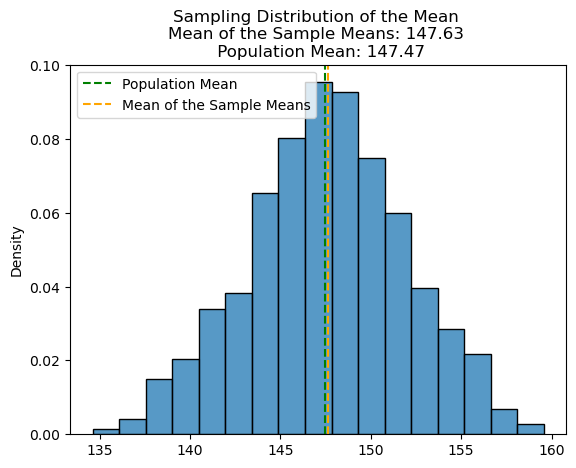

<Figure size 640x480 with 0 Axes>

In [61]:
# Plotting sampling distribution of the sample mean with sample sizes of 30 songs

def choose_statistic(x, sample_stat_text):
  if sample_stat_text == "Mean":
    return np.mean(x)
  elif sample_stat_text == "Minimum":
    return np.min(x)
  elif sample_stat_text == "Variance":
    return np.var(x)
  else:
    raise Exception('Make sure to input "Mean", "Minimum", or "Variance"')

def sampling_distribution(population_data, samp_size, stat):
  sample_stats = []
  for i in range(500):
    samp = np.random.choice(population_data, samp_size, replace = False)
    sample_stat = choose_statistic(samp, stat)
    sample_stats.append(sample_stat)
  
  pop_statistic = round(choose_statistic(population_data, stat),2)
  sns.histplot(sample_stats, stat='density')
  plt.title(f"Sampling Distribution of the {stat} \nMean of the Sample {stat}s: {round(np.mean(sample_stats), 2)} \n Population {stat}: {pop_statistic}")
  plt.axvline(pop_statistic,color='g',linestyle='dashed', label=f'Population {stat}')
  plt.axvline(np.mean(sample_stats),color='orange',linestyle='dashed', label=f'Mean of the Sample {stat}s')
  plt.legend()
  plt.show()
  plt.clf()

sampling_distribution(song_tempos, 30, "Mean")

    

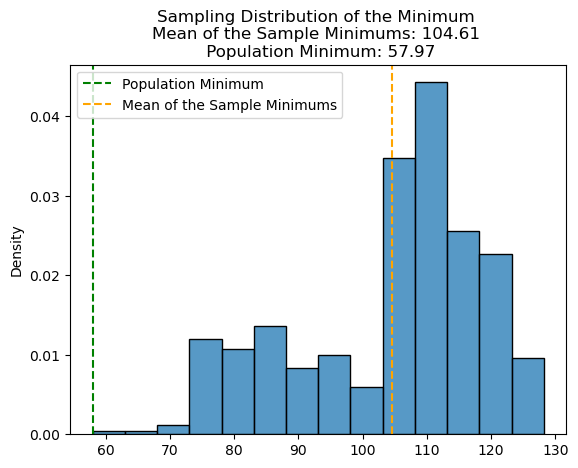

<Figure size 640x480 with 0 Axes>

In [63]:
# Plotting the sampling distribution of the sample minimum with sample sizes of 30 songs

sampling_distribution(song_tempos, 30, "Minimum")


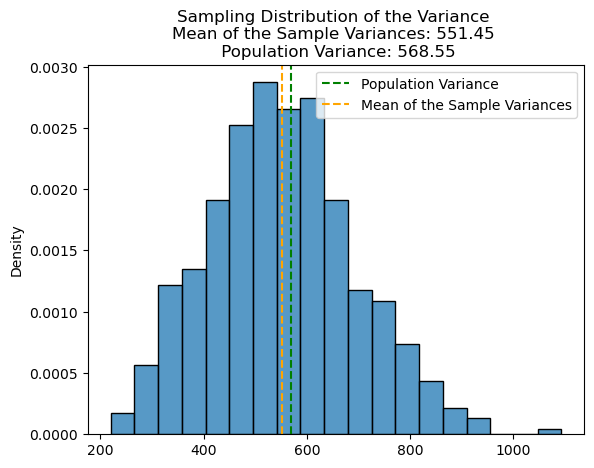

<Figure size 640x480 with 0 Axes>

In [65]:
# Plotting the sampling distribution of the sample variance with sample sizes of 30 songs

sampling_distribution(song_tempos, 30, "Variance")


In [69]:
# Calculating  population mean and population standard deviation, standard error 

population_mean = np.mean(song_tempos)
population_std = np.std(song_tempos)
standard_error = population_std/(30**.5)


In [71]:
# Calculating the probability that the sample mean of 30 selected songs is less than 140bpm
print(stats.norm.cdf(140, population_mean, standard_error))

0.04300355015958663


In [73]:
# The probability that the sample mean of 30 selected songs is GREATER than 150bpm and the party is great?
print(1-stats.norm.cdf(150, population_mean, standard_error))

0.28088028101821816
